# 분류모형의 평가
   
* Confusion Matrix
* Accuracy, Precision, Recall, F1
* ROC, AUC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = LogisticRegression(solver='liblinear', random_state=1)

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도: %.3f' % pipe_lr.score(X_test, y_test))

테스트 정확도: 0.947


# confusion matrix
분류 모형의 성능을 평가한다. 
confusion_matrix 함수를 사용한다.

In [6]:
from sklearn.metrics import confusion_matrix

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 59   5]
 [  4 103]]


###  Accuracy, Precision, Recall, f1

* Accuracy : 정확도. 단순히 정확히 예측한 샘플의 비율 (TP+TN) / (TP+TN+FP+FN)
* Precision : 정밀도. 양성으로 예측한 샘플 중 진짜 양성 클래스의 비율, 예측 노이즈 (TP) / (TP+FP)
* Recall : 재현율, 진짜 양성 샘플 중에서 양성으로 예측한 비율, 양성 샘플을 구분하는 능력 (TP) / (TP+FN)
* f1 : 정밀도와 재현율의 조화평균, 2 * (정밀도*재현율) / (정밀도+재현율), 진짜 양성 레이블을 가진 샘플을 양성으로 성공적으로 예측한 정도를 측정


클래스가 불균형하면 모델의 정확도는 높지만 예측 성능이 나쁜 역설적인 상황도 발생할 수 있다.  
예를 들어 매우 희귀한 암의 발병률이 0.1%라고 하자. 이 경우 단순히 아무도 암에 걸리지 않았다고 예측하는 모형은 정확도가 99.9%가 될 수도 있다. 이 경우 f1 score가 좀 더 정확한 성능 지표가 된다.

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('정밀도(Positive Predictive Value): %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현율(sensitivity, True Positive Rate): %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('정확도: %.3f' % pipe_lr.score(X_test, y_test))
print('F1 Score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

정밀도(Positive Predictive Value): 0.954
재현율(sensitivity, True Positive Rate): 0.963
정확도: 0.947
F1 Score: 0.958


### classification_report

평가 지표의 요약 정보를 확인한다.
* classification_report
    * macro: 단순평균
    * weighted: 각 클래스에 속하는 표본의 갯수로 가중평균
    * accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율. 
    * support: 각 클래스에 속한 샘플의 개수

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Malignant 0', 'Benign 1']))

              precision    recall  f1-score   support

 Malignant 0       0.94      0.92      0.93        64
    Benign 1       0.95      0.96      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



# ROC, AUC

* ROC(Receiver Operating Chracteristic) : 분류 모형의 FPR과 TPR 점수를 기반으로 분류 모형의 성능을 비교 할 때 유용하다.
* AUC(Area Under the Curve) : ROC 그래프의 아래 면적, 1에 가까울 수록 좋은 모형이다.

In [9]:
from sklearn.metrics import roc_curve, auc

probas = pipe_lr.fit(X_test, y_test).predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test,
                                     probas[:, 1],
                                     pos_label=1)
fpr, tpr, thresholds 

(array([0.      , 0.      , 0.      , 0.015625, 0.015625, 0.03125 ,
        0.03125 , 0.0625  , 0.0625  , 0.09375 , 0.09375 , 0.125   ,
        0.125   , 1.      ]),
 array([0.        , 0.00934579, 0.89719626, 0.89719626, 0.90654206,
        0.90654206, 0.95327103, 0.95327103, 0.98130841, 0.98130841,
        0.99065421, 0.99065421, 1.        , 1.        ]),
 array([1.99998706e+00, 9.99987060e-01, 8.72479748e-01, 8.68911009e-01,
        8.58979007e-01, 8.26899497e-01, 7.29051305e-01, 5.90086403e-01,
        4.79158367e-01, 4.51578407e-01, 4.10635018e-01, 3.88609823e-01,
        3.21144201e-01, 5.05011636e-21]))

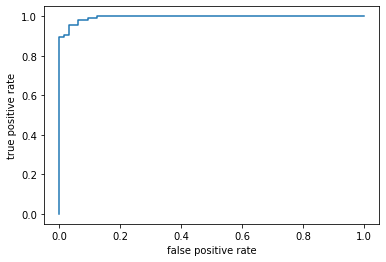

In [10]:
plt.plot(fpr, tpr)

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [11]:
roc_auc = auc(fpr, tpr)
print('AUC : %.3f' % roc_auc)

AUC : 0.995
